# 1. Import and transform data

In [1]:
# download daily price here https://finance.yahoo.com/quote/VTSAX/history/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = '~/Downloads/VTSAX_max.csv'

In [4]:
df = pd.read_csv(data)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Weekday'] = df['Date'].dt.day_name()
df['DayOfMonth'] = df['Date'].dt.day

df = df[(df['Year']>2000) & (df['Year']<2020)].copy() # only use 2001-2019 data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,DayOfWeek,Weekday,DayOfMonth
33,2001-01-02,28.280001,28.280001,28.280001,28.280001,19.756147,0.0,2001,1,1,Tuesday,2
34,2001-01-03,29.760000,29.760000,29.760000,29.760000,20.790062,0.0,2001,1,2,Wednesday,3
35,2001-01-04,29.389999,29.389999,29.389999,29.389999,20.531578,0.0,2001,1,3,Thursday,4
36,2001-01-05,28.540001,28.540001,28.540001,28.540001,19.937780,0.0,2001,1,4,Friday,5
37,2001-01-08,28.459999,28.459999,28.459999,28.459999,19.881893,0.0,2001,1,0,Monday,8


# 2. Visualize price trend

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

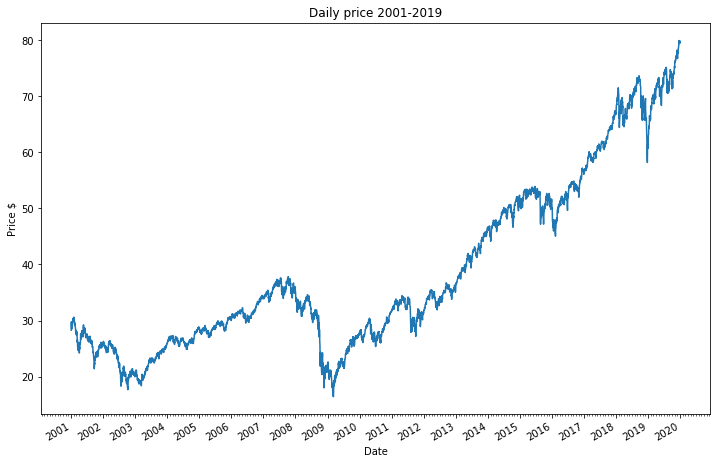

In [7]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot('Date', 'Open', data=df)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

fig.autofmt_xdate()

ax.set_title('Daily price 2001-2019')
ax.set_xlabel('Date')
ax.set_ylabel('Price $')
plt.show()

In [8]:
df_dow = df.groupby(['DayOfWeek','Weekday'],as_index=False).mean()[['Weekday','Open']] # higher price for Thursday and Monday
df_dow

,Weekday,Open
0,Monday,38.858254
1,Tuesday,38.859285
2,Wednesday,38.789418
3,Thursday,38.863410
4,Friday,38.925662


Text(0, 0.5, 'Average price $')

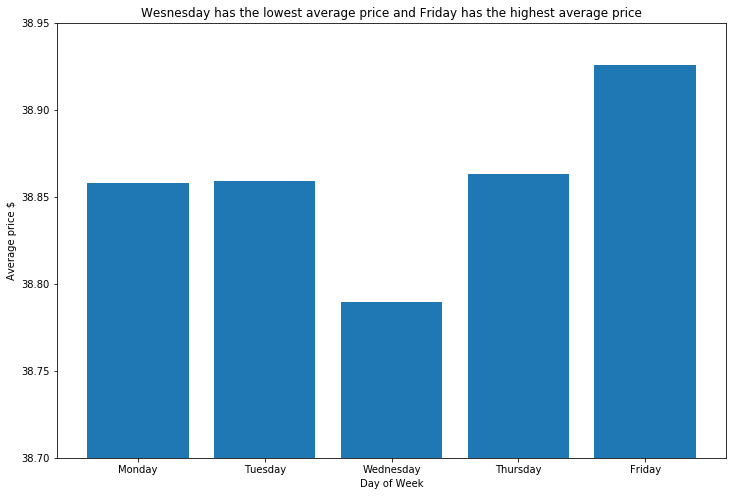

In [9]:
plt.bar(df_dow['Weekday'],df_dow['Open'])
plt.ylim([38.7,38.95])
plt.title('Wesnesday has the lowest average price and Friday has the highest average price')
plt.xlabel('Day of Week')
plt.ylabel('Average price $')

In [10]:
# year
df_year = df.groupby('Year',as_index=False).mean()[['Year','Open']] # higher price for Thursday and Monday
df_year

,Year,Open
0,2001,26.534395
1,2002,22.574603
2,2003,22.348929
3,2004,26.627143
4,2005,28.838691
5,2006,31.643904
6,2007,35.710478
7,2008,29.579051
8,2009,23.236508
9,2010,28.390357


In [11]:
# average YoY
df_year['YoY %'] = df_year['Open'].pct_change() * 100
df_year

,Year,Open,YoY %
0,2001,26.534395,NaN
1,2002,22.574603,-14.923242
2,2003,22.348929,-0.999684
3,2004,26.627143,19.142816
4,2005,28.838691,8.305614
5,2006,31.643904,9.727258
6,2007,35.710478,12.851049
7,2008,29.579051,-17.169826
8,2009,23.236508,-21.442687
9,2010,28.390357,22.179965


In [12]:
df_year['YoY %'].describe()

count    18.000000
mean      6.543881
std      12.943611
min     -21.442687
25%       1.790094
50%       9.016436
75%      16.282029
max      22.179965
Name: YoY %, dtype: float64

Text(0, 0.5, 'Average price $')

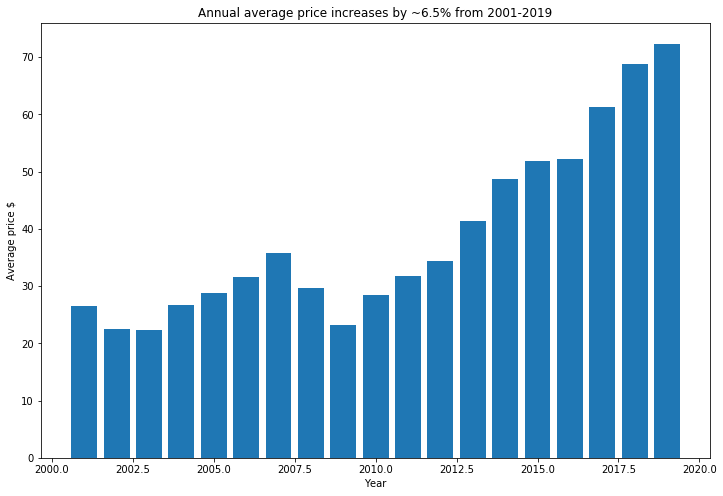

In [18]:
plt.bar(df_year['Year'],df_year['Open'])
# plt.ylim([20,80])
plt.title('Annual average price increases by ~6.5% from 2001-2019')
plt.xlabel('Year')
plt.ylabel('Average price $')

(2001, 2019)

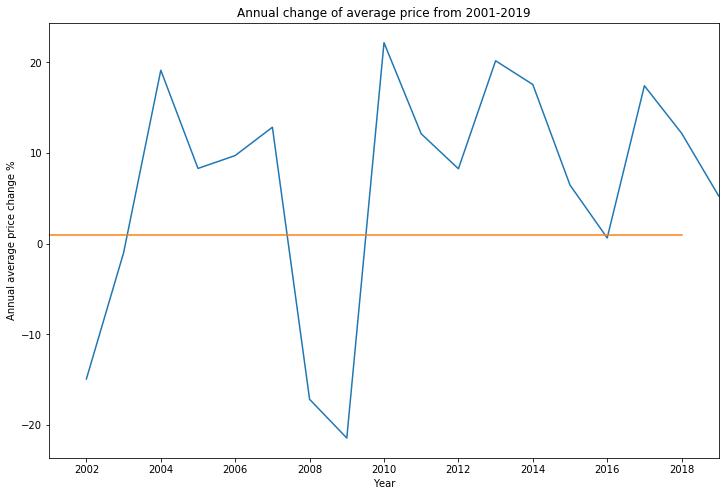

In [15]:
plt.plot(df_year['Year'][1:],df_year['YoY %'][1:])
plt.title('Annual change of average price from 2001-2019')
plt.xlabel('Year')
plt.ylabel('Annual average price change %')
plt.plot(np.linspace(2000,2018,19),[1]*19)
plt.xlim([2001,2019])

# 3. Invest stragegy

In [655]:
def format_number(number):
    return ("{:,}".format(int(number)))
    
def get_return(strategy, dfs, recurring_invest, year, invest_results):
    dfs=dfs[dfs['Year'] >= year].copy()
    dfs['Recurring_invest'] = recurring_invest
    dfs['Recurring_share'] = 1.* dfs['Recurring_invest']/dfs['Open']
    dfs['Cumulative_share'] = dfs['Recurring_share'].cumsum(axis = 0)
    dfs['Cumulative_value'] = dfs['Cumulative_share']  * dfs['Open']
    num_year = dfs['Year'].max() - dfs['Year'].min()
    total_invest = dfs['Recurring_invest'].sum()
    total_value = dfs['Cumulative_value'].values[-1]
    gain = 100* (total_value - total_invest)/total_invest
    cagr = 100 * ((total_value/total_invest)**(1./num_year)-1)
    invest_dict = dict()
    invest_dict['strategy'] = strategy
    invest_dict['recurring_invest'] = recurring_invest
    invest_dict['total_times_invested'] = len(dfs)
    invest_dict['total_money_invested'] = total_invest
    invest_dict['total_money_value'] = total_value
    invest_dict['gain%'] = gain
    invest_dict['cagr%'] = cagr
    invest_dict['start_year'] = year
    invest_results.append(invest_dict)
    print ("Invest strategy: %s from %s" %(strategy, year))
    print ("Total times of invest: ", format_number(len(dfs)))
    print ("Total money invested: ",format_number(total_invest))
    print ("Total money valued: ", format_number(total_value))
    print ("Total gain: %.2f"%gain,"%")
    print ("Compound annual growth rate %.2f"%cagr,"%")

In [782]:
DAILY_INVEST = 100
WEEKLY_INVEST = 500
MONTHLY_INVEST = 2000

START_YEAR = 2000

In [783]:
invest_results = []

## 3.1 buy daily

In [784]:
dfs= df[['Date','Open','Year','Month','DayOfWeek']].copy()
get_return("Daily", dfs, DAILY_INVEST,START_YEAR, invest_results)

Invest strategy: Daily from 2000
Total times of invest:  4,779
Total money invested:  477,900
Total money valued:  1,127,417
Total gain: 135.91 %
Compound annual growth rate 4.88 %


## 3.2 buy weekly

In [785]:
dfs= df[df['DayOfWeek'] == 0][['Date','Open','Year','Month','DayOfWeek']].copy()
get_return("Each Monday", dfs, WEEKLY_INVEST, START_YEAR, invest_results)
# monday is always closed, so not so good

Invest strategy: Each Monday from 2000
Total times of invest:  899
Total money invested:  449,500
Total money valued:  1,058,757
Total gain: 135.54 %
Compound annual growth rate 4.87 %


In [786]:
dfs= df[df['DayOfWeek'] == 1][['Date','Open','Year','Month','DayOfWeek']].copy()
get_return("Each Tuesday", dfs, WEEKLY_INVEST, START_YEAR, invest_results)

Invest strategy: Each Tuesday from 2000
Total times of invest:  979
Total money invested:  489,500
Total money valued:  1,155,396
Total gain: 136.04 %
Compound annual growth rate 4.89 %


In [787]:
dfs= df[df['DayOfWeek'] == 2][['Date','Open','Year','Month','DayOfWeek']].copy()
get_return("Each Wednesday", dfs, WEEKLY_INVEST, START_YEAR, invest_results)

Invest strategy: Each Wednesday from 2000
Total times of invest:  980
Total money invested:  490,000
Total money valued:  1,148,542
Total gain: 134.40 %
Compound annual growth rate 4.85 %


In [788]:
dfs= df[df['DayOfWeek'] == 3][['Date','Open','Year','Month','DayOfWeek']].copy()
get_return("Each Thursday", dfs, WEEKLY_INVEST, START_YEAR, invest_results)

Invest strategy: Each Thursday from 2000
Total times of invest:  962
Total money invested:  481,000
Total money valued:  1,136,612
Total gain: 136.30 %
Compound annual growth rate 4.89 %


In [789]:
dfs= df[df['DayOfWeek'] == 4][['Date','Open','Year','Month','DayOfWeek']].copy()
get_return("Each Friday", dfs, WEEKLY_INVEST, START_YEAR, invest_results)

Invest strategy: Each Friday from 2000
Total times of invest:  959
Total money invested:  479,500
Total money valued:  1,132,563
Total gain: 136.20 %
Compound annual growth rate 4.89 %


## 3.3 buy monthly

In [790]:
df_group = df.groupby(['Year','Month'],as_index=False).min()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("First day of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: First day of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,042,609
Total gain: 128.64 %
Compound annual growth rate 4.70 %


In [791]:
df_group = df.groupby(['Year','Month'],as_index=False).max()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("Last day of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: Last day of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,074,135
Total gain: 135.56 %
Compound annual growth rate 4.87 %


In [792]:
df_group = df[df['DayOfWeek']==0].groupby(['Year','Month'],as_index=False).min()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("First Monday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: First Monday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,042,037
Total gain: 128.52 %
Compound annual growth rate 4.70 %


In [793]:
df_group = df[df['DayOfWeek']==1].groupby(['Year','Month'],as_index=False).min()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("First Tuesday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: First Tuesday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,037,088
Total gain: 127.43 %
Compound annual growth rate 4.67 %


In [794]:
df_group = df[df['DayOfWeek']==2].groupby(['Year','Month'],as_index=False).min()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("First Wednesday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: First Wednesday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,041,236
Total gain: 128.34 %
Compound annual growth rate 4.69 %


In [795]:
df_group = df[df['DayOfWeek']==3].groupby(['Year','Month'],as_index=False).min()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("First Thursday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: First Thursday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,044,563
Total gain: 129.07 %
Compound annual growth rate 4.71 %


In [796]:
df_group = df[df['DayOfWeek']==4].groupby(['Year','Month'],as_index=False).min()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("First Friday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: First Friday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,054,388
Total gain: 131.23 %
Compound annual growth rate 4.77 %


In [797]:
df_group = df[df['DayOfWeek']==0].groupby(['Year','Month'],as_index=False).max()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("Last Monday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: Last Monday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,074,640
Total gain: 135.67 %
Compound annual growth rate 4.88 %


In [798]:
df_group = df[df['DayOfWeek']==1].groupby(['Year','Month'],as_index=False).max()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("Last Tuesday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: Last Tuesday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,076,306
Total gain: 136.03 %
Compound annual growth rate 4.89 %


In [799]:
df_group = df[df['DayOfWeek']==2].groupby(['Year','Month'],as_index=False).max()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("Last Wesneday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: Last Wesneday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,066,905
Total gain: 133.97 %
Compound annual growth rate 4.84 %


In [800]:
df_group = df[df['DayOfWeek']==3].groupby(['Year','Month'],as_index=False).max()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("Last Thursday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: Last Thursday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,078,419
Total gain: 136.50 %
Compound annual growth rate 4.90 %


In [801]:
df_group = df[df['DayOfWeek']==4].groupby(['Year','Month'],as_index=False).max()['Date'] # first or last dow of the month
dfs = pd.merge(df, df_group, on='Date')
get_return("Last Friday of each month", dfs, MONTHLY_INVEST, START_YEAR, invest_results)

Invest strategy: Last Friday of each month from 2000
Total times of invest:  228
Total money invested:  456,000
Total money valued:  1,077,552
Total gain: 136.31 %
Compound annual growth rate 4.89 %


In [781]:
df_invest2019 = pd.DataFrame.from_dict(invest_results)
df_invest2019.sort_values('gain%',ascending=False)

,cagr%,gain%,recurring_invest,start_year,strategy,total_money_invested,total_money_value,total_times_invested
4,inf,11.073665,500,2019,Each Thursday,25000,27768.416370,50
5,inf,10.523138,500,2019,Each Friday,25500,28183.400072,51
0,inf,10.418203,100,2019,Daily,25200,27825.387168,252
2,inf,10.214149,500,2019,Each Tuesday,26000,28655.678823,52
3,inf,10.126796,500,2019,Each Wednesday,25500,28082.332878,51
16,inf,9.915993,2000,2019,Last Thursday of each month,24000,26379.838351,12
17,inf,9.836564,2000,2019,Last Friday of each month,24000,26360.775404,12
14,inf,9.807309,2000,2019,Last Tuesday of each month,24000,26353.754193,12
1,inf,9.622556,500,2019,Each Monday,24000,26309.413384,48
7,inf,9.497177,2000,2019,Last day of each month,24000,26279.322418,12


In [760]:
df_invest2018 = pd.DataFrame.from_dict(invest_results)
df_invest2018.sort_values('gain%',ascending=False)

,cagr%,gain%,recurring_invest,start_year,strategy,total_money_invested,total_money_value,total_times_invested
4,13.743968,13.743968,500,2018,Each Thursday,50500,57440.703981,101
5,13.474473,13.474473,500,2018,Each Friday,51000,57871.981048,102
16,13.433282,13.433282,2000,2018,Last Thursday of each month,48000,54447.975353,24
17,13.388909,13.388909,2000,2018,Last Friday of each month,48000,54426.676254,24
14,13.301950,13.301950,2000,2018,Last Tuesday of each month,48000,54384.935902,24
0,13.256878,13.256878,100,2018,Daily,50300,56968.209543,503
7,13.043097,13.043097,2000,2018,Last day of each month,48000,54260.686745,24
2,12.977452,12.977452,500,2018,Each Tuesday,51500,58183.387544,103
1,12.915985,12.915985,500,2018,Each Monday,48000,54199.672862,96
13,12.812439,12.812439,2000,2018,Last Monday of each month,48000,54149.970587,24


In [739]:
df_invest2015 = pd.DataFrame.from_dict(invest_results)
df_invest2015.sort_values('gain%',ascending=False)

,cagr%,gain%,recurring_invest,start_year,strategy,total_money_invested,total_money_value,total_times_invested
4,7.456039,33.328596,500,2015,Each Thursday,127000,169327.316322,254
17,7.355905,32.832316,2000,2015,Last Friday of each month,120000,159398.779058,60
2,7.354587,32.825793,500,2015,Each Tuesday,129000,171345.273138,258
14,7.352916,32.817524,2000,2015,Last Tuesday of each month,120000,159381.028435,60
5,7.351084,32.808460,500,2015,Each Friday,126500,168002.702417,253
16,7.348801,32.797160,2000,2015,Last Thursday of each month,120000,159356.591614,60
0,7.345451,32.780586,100,2015,Daily,125800,167037.977219,1258
7,7.283913,32.476370,2000,2015,Last day of each month,120000,158971.644074,60
13,7.280940,32.461687,2000,2015,Last Monday of each month,120000,158954.024411,60
1,7.221066,32.166224,500,2015,Each Monday,118000,155956.144512,236


In [718]:
df_invest2010 = pd.DataFrame.from_dict(invest_results)
df_invest2010.sort_values('gain%',ascending=False)

,cagr%,gain%,recurring_invest,start_year,strategy,total_money_invested,total_money_value,total_times_invested
4,6.699730,79.254431,500,2010,Each Thursday,253500,454409.982241,507
5,6.673205,78.853761,500,2010,Each Friday,253000,452500.015813,506
17,6.656907,78.607987,2000,2010,Last Friday of each month,240000,428659.169323,120
0,6.649225,78.492241,100,2010,Daily,251600,449086.479381,2516
16,6.649198,78.491838,2000,2010,Last Thursday of each month,240000,428380.412148,120
2,6.647657,78.468625,500,2010,Each Tuesday,258000,460449.051543,516
14,6.632972,78.247579,2000,2010,Last Tuesday of each month,240000,427794.189401,120
7,6.616823,78.004764,2000,2010,Last day of each month,240000,427211.434213,120
13,6.601181,77.769868,2000,2010,Last Monday of each month,240000,426647.682325,120
3,6.589658,77.596994,500,2010,Each Wednesday,257500,457312.259539,515


In [697]:
df_invest2007 = pd.DataFrame.from_dict(invest_results)
df_invest2007.sort_values('gain%',ascending=False)

,cagr%,gain%,recurring_invest,start_year,strategy,total_money_invested,total_money_value,total_times_invested
4,6.083418,103.128123,500,2007,Each Thursday,329500,669307.164314,659
16,6.076741,102.974755,2000,2007,Last Thursday of each month,312000,633281.236610,156
17,6.076430,102.967604,2000,2007,Last Friday of each month,312000,633258.925789,156
5,6.068795,102.792373,500,2007,Each Friday,328000,665158.984768,656
2,6.068130,102.777124,500,2007,Each Tuesday,335000,679303.367021,670
0,6.066163,102.731992,100,2007,Daily,327200,663339.078212,3272
13,6.060310,102.597799,2000,2007,Last Monday of each month,312000,632105.132583,156
14,6.060278,102.597067,2000,2007,Last Tuesday of each month,312000,632102.847950,156
7,6.046734,102.286815,2000,2007,Last day of each month,312000,631134.862686,156
1,6.042373,102.187001,500,2007,Each Monday,308000,622735.963476,616


In [676]:
df_invest2000 = pd.DataFrame.from_dict(invest_results)
df_invest2000.sort_values('gain%',ascending=False)

,cagr%,gain%,recurring_invest,start_year,strategy,total_money_invested,total_money_value,total_times_invested
16,4.898178,136.495571,2000,2000,Last Thursday of each month,456000,1.078420e+06,228
17,4.893489,136.305354,2000,2000,Last Friday of each month,456000,1.077552e+06,228
4,4.893404,136.301895,500,2000,Each Thursday,481000,1.136612e+06,962
5,4.890813,136.196849,500,2000,Each Friday,479500,1.132564e+06,959
2,4.886845,136.036098,500,2000,Each Tuesday,489500,1.155397e+06,979
14,4.886747,136.032107,2000,2000,Last Tuesday of each month,456000,1.076306e+06,228
0,4.883752,135.910813,100,2000,Daily,477900,1.127418e+06,4779
13,4.877721,135.666772,2000,2000,Last Monday of each month,456000,1.074640e+06,228
7,4.874981,135.555961,2000,2000,Last day of each month,456000,1.074135e+06,228
1,4.874616,135.541196,500,2000,Each Monday,449500,1.058758e+06,899
